## Ford GoBike Exploration


### By Chisom Eluwa


### Introduction

This document explores a dataset containing information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install seaborn --upgrade   #upgrade seaborn version

    100% |████████████████████████████████| 296kB 7.2MB/s ta 0:00:011
    100% |████████████████████████████████| 13.4MB 3.1MB/s eta 0:00:01  8% |██▋                             | 1.1MB 29.0MB/s eta 0:00:01    97% |███████████████████████████████▏| 13.0MB 28.1MB/s eta 0:00:01
    100% |████████████████████████████████| 11.5MB 3.7MB/s eta 0:00:01  3% |█                               | 368kB 23.0MB/s eta 0:00:01    25% |████████▎                       | 3.0MB 27.0MB/s eta 0:00:01    48% |███████████████▋                | 5.6MB 26.9MB/s eta 0:00:01    60% |███████████████████▎            | 7.0MB 27.2MB/s eta 0:00:01
    100% |████████████████████████████████| 49.4MB 817kB/s eta 0:00:01  1% |▍                               | 542kB 24.7MB/s eta 0:00:02    3% |█▏                              | 1.8MB 25.5MB/s eta 0:00:02    16% |█████▎                          | 8.1MB 23.4MB/s eta 0:00:02    18% |██████                          | 9.3MB 25.0MB/s eta 0:00:02    21% |██████▊                     

In [3]:
# Load our data with pandas
ford_bikes = pd.read_csv("201902-fordgobike-tripdata.csv")

In [4]:
# High level data overview

print(ford_bikes.shape)
print(ford_bikes.dtypes)
print(ford_bikes.head(10))

(183412, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object
   duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:2

In [5]:
# descriptive analysis
print(ford_bikes.describe())

        duration_sec  start_station_id  start_station_latitude  \
count  183412.000000     183215.000000           183412.000000   
mean      726.078435        138.590427               37.771223   
std      1794.389780        111.778864                0.099581   
min        61.000000          3.000000               37.317298   
25%       325.000000         47.000000               37.770083   
50%       514.000000        104.000000               37.780760   
75%       796.000000        239.000000               37.797280   
max     85444.000000        398.000000               37.880222   

       start_station_longitude  end_station_id  end_station_latitude  \
count            183412.000000   183215.000000         183412.000000   
mean               -122.352664      136.249123             37.771427   
std                   0.117097      111.515131              0.099490   
min                -122.453704        3.000000             37.317298   
25%                -122.412408       44.00000

## Insights in our data

 - Data contains 183412 rows, 16 columns
 
 ##### for data types of each column, we notice: 
 
 
 - member_birth_year is float but should be object type
 - biker_id, end_station_id, start_station_id, are float type but should be object type
 


In [6]:
# Check column names
ford_bikes.columns   

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

In [7]:
# Check for possible duplicates
ford_bikes.loc[ford_bikes.duplicated(keep=False), :] 

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip


## Cleaning process

## Define

#### 1) check and drop the rows with missing data

#### Code

In [8]:
ford_bikes.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [9]:
# drop rows with missing data in the specific columns
ford_bikes.dropna(axis=0, subset=['start_station_id', 'start_station_name', 'end_station_id', 
                                 'start_station_name', 'member_birth_year', 'member_gender'], inplace=True)

#### Test

In [10]:
ford_bikes.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

### 2) Incorrect Data types

#### Define

##### Change all columns with incorrect data types to the right data types

#### Code

In [11]:
ford_bikes = ford_bikes.astype({'start_station_id': str, 'end_station_id': str, 'bike_id': str, 'member_birth_year': int})

In [12]:
# Change the time columns from object to datetime
ford_bikes[['start_time','end_time']] = ford_bikes[['start_time','end_time']].apply(pd.to_datetime)

#### Test

In [13]:
ford_bikes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null object
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null object
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null object
user_type                  174952 non-null object
member_birth_year          174952 non-null int64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
dtypes: datetime64[ns](2), float64(4), int64(2), object(8)
memory usage

### 3) Define: Split the start date and end time column into start_date, start_time, end_date, and end_time.

### Code

In [14]:
### Further create a Day, month, hour category from the time and year column options

ford_bikes['start_day'] = ford_bikes['start_time'].dt.day_name()
ford_bikes['start_month'] = ford_bikes['start_time'].dt.month_name()

# bike['start_year'] = bike['start_time'].dt.year
ford_bikes['start_hour'] = ford_bikes['start_time'].dt.hour
ford_bikes['start_hour'] = ford_bikes.start_hour.astype(str)


ford_bikes['end_day'] = ford_bikes['end_time'].dt.day_name()
ford_bikes['end_month'] = ford_bikes['end_time'].dt.month_name()
ford_bikes['end_hour'] = ford_bikes['end_time'].dt.hour
ford_bikes['end_hour'] = ford_bikes.end_hour.astype(str)


### Test

In [15]:
ford_bikes.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip',
       'start_day', 'start_month', 'start_hour', 'end_day', 'end_month',
       'end_hour'],
      dtype='object')

# Questions

### What is the structure of the dataset?

- There are 183412 rows and 16 features ('duration_sec', 'start_time', 'end_time', 'start_station_id','start_station_name', 'start_station_latitude','start_station_longitude', 'end_station_id', 'end_station_name','end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type','member_birth_year', 'member_gender', 'bike_share_for_all_trip')





### What is/are the main feature(s) of interest?

 -  Average length of each trip
 -  Type of subscribers
 -  Gender of members or other variables and how they influence other variables
 
 
 
 ### What are features of the data set will help support your investigation with respect to the feature of interest.

- From a glance, i see the gender, birth year, duration, time, and date as features that would uncover some insights on the process and the behaviour of users on the bike sharing system.



# Univariate Exploration

#### 1) What is the percentage of members that are registered on the Ford Bikers system?

In [16]:
ford_bikes['member_gender'].value_counts()

Male      130500
Female     40805
Other       3647
Name: member_gender, dtype: int64

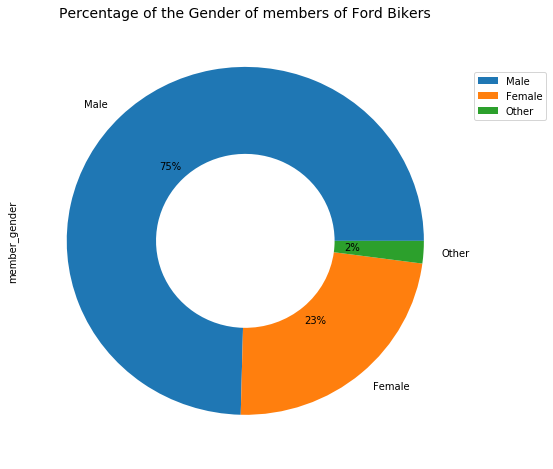

In [17]:
gender = ford_bikes.member_gender.value_counts()
gender.plot(kind='pie', figsize=(8,8), wedgeprops={'width':0.5}, autopct='%1.0f%%');
plt.title('Percentage of the Gender of members of Ford Bikers', size=14);
plt.legend(bbox_to_anchor=(1, 0.9), loc='upper left');

#### 2) What is the number of different user types on the Ford Bikers system?

In [18]:
ford_bikes['user_type'].value_counts()

Subscriber    158386
Customer       16566
Name: user_type, dtype: int64

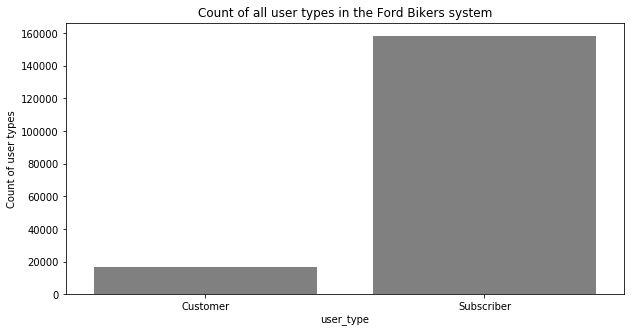

In [19]:
users = ford_bikes['user_type'].value_counts().index
plt.figure(figsize=(10,5))
sns.countplot(data=ford_bikes, x='user_type', color='grey')
plt.ylabel('Count of user types')
plt.xlabel('user_type')
plt.title('Count of all user types in the Ford Bikers system');

#### What is the distribution of the duration of each trip?

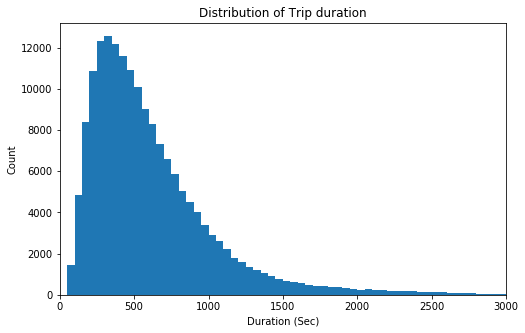

In [20]:
binsize = 50
bins = np.arange(50, ford_bikes['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = ford_bikes, x = 'duration_sec', bins=bins)
plt.xlabel('Duration (Sec)')
plt.ylabel('Count')
plt.title('Distribution of Trip duration');
plt.xlim([0, 3000]);

#### 3) What is the age distribution of Ford GoBike customer?

AttributeError: Unknown property bins

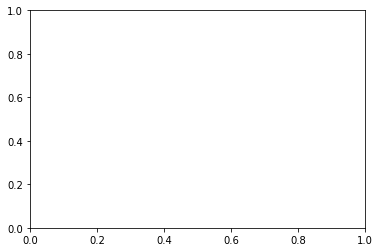

In [24]:
sns.displot(data = ford_bikes, 
            x = 'member_birth_year', kde=True, bins=100).set(title='Age Distribution of year of birth of Ford GoBike Members');


### The member birth year gives us an idea of the distribution but not very intuitive, we convert to age

In [ ]:
# Plot a new viz of age distribution from Members Year of Birth Column

binsize = 1
bins = np.arange(0, ford_bikes['member_birth_year'].astype(float).max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = ford_bikes, x = 'member_birth_year', bins = bins);
plt.axis([1939, 2009, 0, 11000])
plt.xticks([1939, 1949, 1959, 1969, 1979, 1989, 1999, 2009], [(2019-1939), (2019-1949), (2019-1959), (2019-1969), (2019-1979), (2019-1989), (2019-1999), (2019-2009)])
plt.gca().invert_xaxis()
plt.xlabel('Age (in years)')
plt.ylabel('Count of Users')
plt.title('Age distribution of Ford GoBike Members');

#### We see a distribution slighly skewed to the right with alot of observations within ages 19-45 for the members.

#### 4) How is the data of Members distributed with respect to time (day, month, year)

In [ ]:
# convert day, and hour into ordered categorical types
ordinal_dict = {'start_day': ['Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday', 'Sunday'],
                    'end_day': ['Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday', 'Sunday'],
                   'start_hour': [str(x) for x in range(0,24)],
                   'end_hour': [str(x) for x in range(0,24)]}

for var in ordinal_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_dict[var])
    ford_bikes[var] = ford_bikes[var].astype(ordered_var)

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=ford_bikes, x='start_hour', color='lightblue')
plt.ylabel('Count')
plt.xlabel('Start hour of trip')
plt.title('Vizualization of the count of Start hour of trips');


plt.figure(figsize=(10,5))
sns.countplot(data=ford_bikes, x='end_hour', color='grey')
plt.ylabel('Count')
plt.xlabel('End hour of trip')
plt.title('Vizualization of the count of End hour of trips');

#### Insights

- We see rising trends for start and end hours between 6th to 9th hour (6am - 9am) and between 16th & 21st hour (4pm and 7pm). This might be because people are commuting to and back from work or businesses during these times

- The lowest trend is between 0hr to 5hrs (12midnight - 5am). This are typically sleeping hours.

#### 5) What day of the week has the highest start and end trips by members

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=ford_bikes, x='start_day', color='lightgreen')
plt.ylabel('Count')
plt.xlabel('Start day of trip')
plt.title('Vizualization of Start day for trips in a week');


plt.figure(figsize=(10,5))
sns.countplot(data=ford_bikes, x='end_day', color='grey')
plt.ylabel('Count')
plt.xlabel('End day of trip')
plt.title('Vizualization of End day for trips in a week');

#### Insights 

 - We observe Tuesdays and Thursdays are the highest days for trips to begin and end... 
 - Saturdays and Sundays are the least days for both perhaps because there's less commuting since it is a weekend.


#### 6) What is the frequency of riders who share rides on different trips

In [ ]:
sharing = ford_bikes.bike_share_for_all_trip.value_counts()
sharing.plot(kind='pie', figsize=(8,8), wedgeprops={'width':0.3}, autopct='%1.0f%%');
plt.title('Percentage of the riders who share bikes for all trips', size=14);
plt.legend(bbox_to_anchor=(1, 0.9), loc='upper left');


# Bivariate Exploration

#### 7) What is the relationship between member gender and the length of their travels?

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Duration of trips by Gender of Members')
sns.boxplot(data=ford_bikes, x = 'member_gender', y='duration_sec', color = base_color);

In [ ]:
# We reduce the max limit of y-axis to see the distinction in the visualization

plt.figure(figsize=(12,8))
base_color = sns.color_palette()[1]
plt.ylim([-10, 1500])
plt.xlabel('Gender of Members')
plt.ylabel('Duration (sec)')
sns.boxplot(data=ford_bikes, x = 'member_gender', y='duration_sec', color = base_color);

##### We see that Female/Other Gender travel longer trips than Male members.

#### 8) How does travel duration vary between user types

In [ ]:
plt.figure(figsize=(12,8))
base_color = sns.color_palette()[1]
plt.ylim([-10, 2000])
plt.xlabel('User Type')
plt.ylabel('Duration in (sec)')
sns.boxplot(data=ford_bikes, x = 'user_type', y='duration_sec', color = base_color);

#### We observe that the "Customer" User type category take longer trips than the "subscriber" type.

#### 9) What is the relationship between user type and member's gender?

In [ ]:
plt.figure(figsize = [8, 8])
plt.title('Number of each gender that are subscribed to different user type plans')
sns.countplot(data = ford_bikes, x = 'user_type', hue = 'member_gender')
plt.legend(bbox_to_anchor=(1, 0.9), loc='upper left');
plt.show()

#### 15) What is the correlation relationship of the numeric variables?

In [ ]:
plt.figure(figsize=(14,5))
sns.heatmap(ford_bikes.corr(), annot=True);

#### The columns worthy of comparisons are duration time and birth year and we see there's no correlation between them.

#### 10) What is the count of different User types who share bikes for all trips?

In [ ]:
plt.figure(figsize = [8, 8])
sns.countplot(data = ford_bikes, x = 'user_type', hue = 'bike_share_for_all_trip', 
              order=ford_bikes.user_type.value_counts().index,
             palette = 'Greens')
plt.title("User type of users who share their bike for all rides")
plt.legend(bbox_to_anchor=(1, 0.9), loc='upper left');

#### Only Subscribers seem to share bikes for all trips

#### 11) How does the user type riders vary within each day?

In [ ]:
plt.figure(figsize = [8, 8])
sns.countplot(data = ford_bikes, x = 'start_day', hue = 'user_type', palette = 'Oranges');
plt.title("Distribution of User type daily")
plt.legend(bbox_to_anchor=(1, 0.9), loc='upper left');
plt.xticks(rotation=25);

#### There are more Subscribers than Customers on every day of the week; there are more Subscribers taking trips on Thursdays.

# Multivariate Exploration

#### 12) What is the duration of trips daily across gender?

In [ ]:
plt.figure(figsize=(15,6))
plt.title('Duration times for trips by each gender')
sns.barplot(data=ford_bikes, y = 'duration_sec', x='start_day', hue = 'member_gender', ci=None, palette = 'Blues');

#### 13) What is the duration of trips daily across user type?

In [ ]:
plt.figure(figsize=(15,6))
plt.title('Duration times for trips by each User')
sns.pointplot(data=ford_bikes, y = 'duration_sec', x='start_day', hue = 'user_type', 
            dodge = 0.4, ci=None, palette = 'inferno_r');

#### We observe that Customer type travel longer durations than Subscribers. The Customer members travel longer during weekends while the trend is relatively flat for subscriber type

#### 14) What is the relationship between travel time and gender who share bikes for all their trips?

In [ ]:
fig = plt.figure(figsize = [8,6])
ax = sns.pointplot(data = ford_bikes, hue ='member_gender', y = 'duration_sec', x = 'bike_share_for_all_trip',
           palette = 'Reds', linestyles = '', dodge = 0.4)
plt.title('Trip Duration across gender and bike_share_for_all_trip')
plt.ylabel('Average Trip Duration (Secs)')
ax.set_yticklabels([],minor = True)
plt.show();

##### Members who share bikes for all trips are mostly "Other" genders and equally travel longer.

# Conclusion


- The dataset is for the months of February and March 2019
- The mean duration for the trips is 726 seconds
- The ford bikers users contain 75% male, 23% female, 2% others
- The weekends have the least trips for starting and ending
- The user type shows two categories: Subscriber 158386 members and Customer 16566 members.
- The most prominent members fall within ages 19-45 for the members
- Trip durations on weekends are longer than on weekdays.
- Peak periods are between 6th to 9th hour (6am - 9am) and between 16th & 21st hour (4pm and 7pm). 
- The lowest trip periods is between 0hr to 5hrs (12midnight - 5am)
- Only 10% of users share bikes for all trips.
- Only subscribers have records of shared trips
- Customer take longer times than Subscribers
- There are more males as both Customer and Subscriber user type than other genders.
- The gender of entries as "others" travel longer times than male and females.
- There are more Subscribers than Customers on every day of the week; there are more Subscribers taking trips on Thursdays.


In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Ford GoBike System Data Part 1.ipynb'])